In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style for professional reporting
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Ignore warnings for cleaner notebook output
import warnings
warnings.filterwarnings('ignore')

print("✅ Environment Setup Complete")

✅ Environment Setup Complete


In [2]:
# Load the dataset
# Assuming standard fertilizer dataset structure
df = pd.read_csv('fertlizer_recommendation_dataset.csv')

# Standardize column names (lowercase, strip spaces) for easier coding
df.columns = df.columns.str.lower().str.strip()

# Display first 5 rows to understand structure
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (5410, 11)


,temperature,moisture,rainfall,ph,nitrogen,phosphorous,potassium,carbon,soil,crop,fertilizer
0,31.509817,0.790060,79.622934,7.062208,58.272313,145.641529,95.755257,1.016942,Loamy Soil,Black Gram,Balanced Npk Fertilizer
1,21.172795,0.474013,108.737846,3.908613,86.969711,48.438430,60.458043,1.899822,Acidic Soil,Apple,Dap
2,26.709040,0.700455,147.902930,7.686317,67.237642,72.052983,66.130032,1.823794,Peaty Soil,Sugarcane,Organic Fertilizer
3,28.087354,0.508450,130.765977,6.673741,60.641956,104.343243,104.066399,1.617141,Neutral Soil,Wheat,Water Retaining Fertilizer
4,40.602936,0.688845,41.372720,5.501975,50.728957,24.097807,57.642007,0.649420,Acidic Soil,Millet,Dap


In [4]:
# Check for data types and missing values
print("--- Data Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Unique Values in Categorical Columns ---")
print(f"Soil Types: {df['soil'].unique()}")
print(f"Crop Types: {df['crop'].unique()}")
print(f"Fertilizers: {df['fertilizer'].unique()}")

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  5410 non-null   float64
 1   moisture     5410 non-null   float64
 2   rainfall     5410 non-null   float64
 3   ph           5410 non-null   float64
 4   nitrogen     5410 non-null   float64
 5   phosphorous  5410 non-null   float64
 6   potassium    5410 non-null   float64
 7   carbon       5410 non-null   float64
 8   soil         5410 non-null   object 
 9   crop         5410 non-null   object 
 10  fertilizer   5410 non-null   object 
dtypes: float64(8), object(3)
memory usage: 465.1+ KB
None

--- Missing Values ---
temperature    0
moisture       0
rainfall       0
ph             0
nitrogen       0
phosphorous    0
potassium      0
carbon         0
soil           0
crop           0
fertilizer     0
dtype: int64

--- Unique Values in Categorical Columns ---


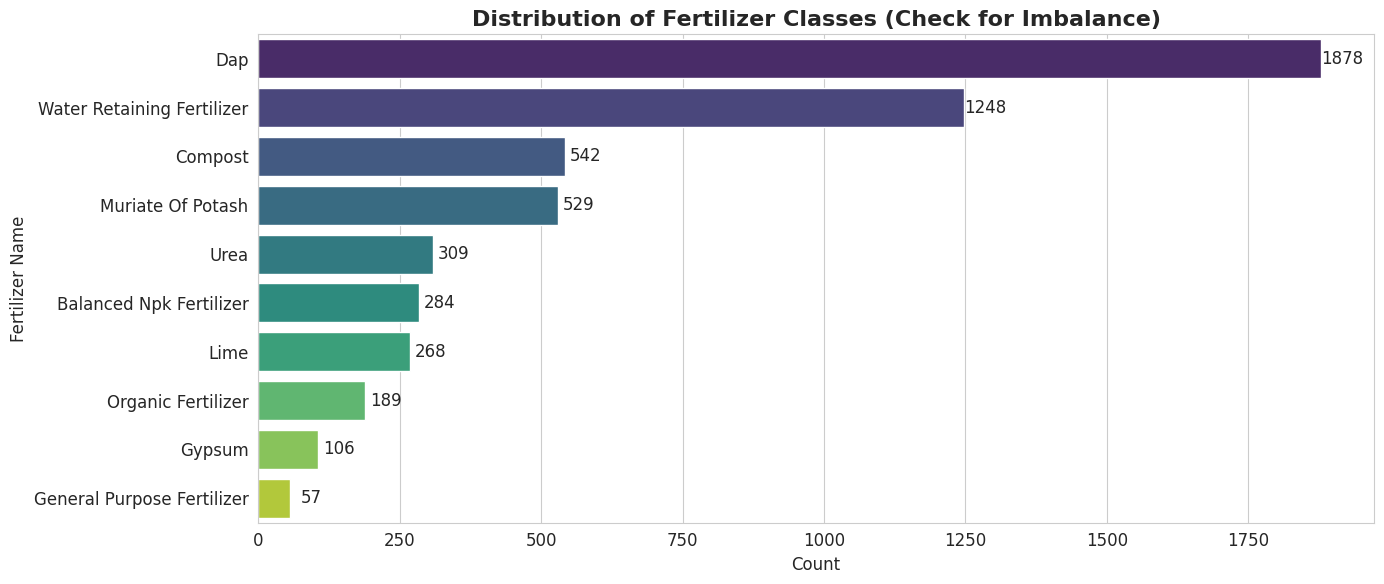

In [6]:
# Distribution of the Target Variable (Fertilizer Name)
plt.figure(figsize=(14, 6))
ax = sns.countplot(y='fertilizer', data=df, palette='viridis', order=df['fertilizer'].value_counts().index)

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha = 'center', va = 'center',
                xytext = (15, 0),
                textcoords = 'offset points')

plt.title('Distribution of Fertilizer Classes (Check for Imbalance)', fontsize=16, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Fertilizer Name')
plt.tight_layout()
plt.show()

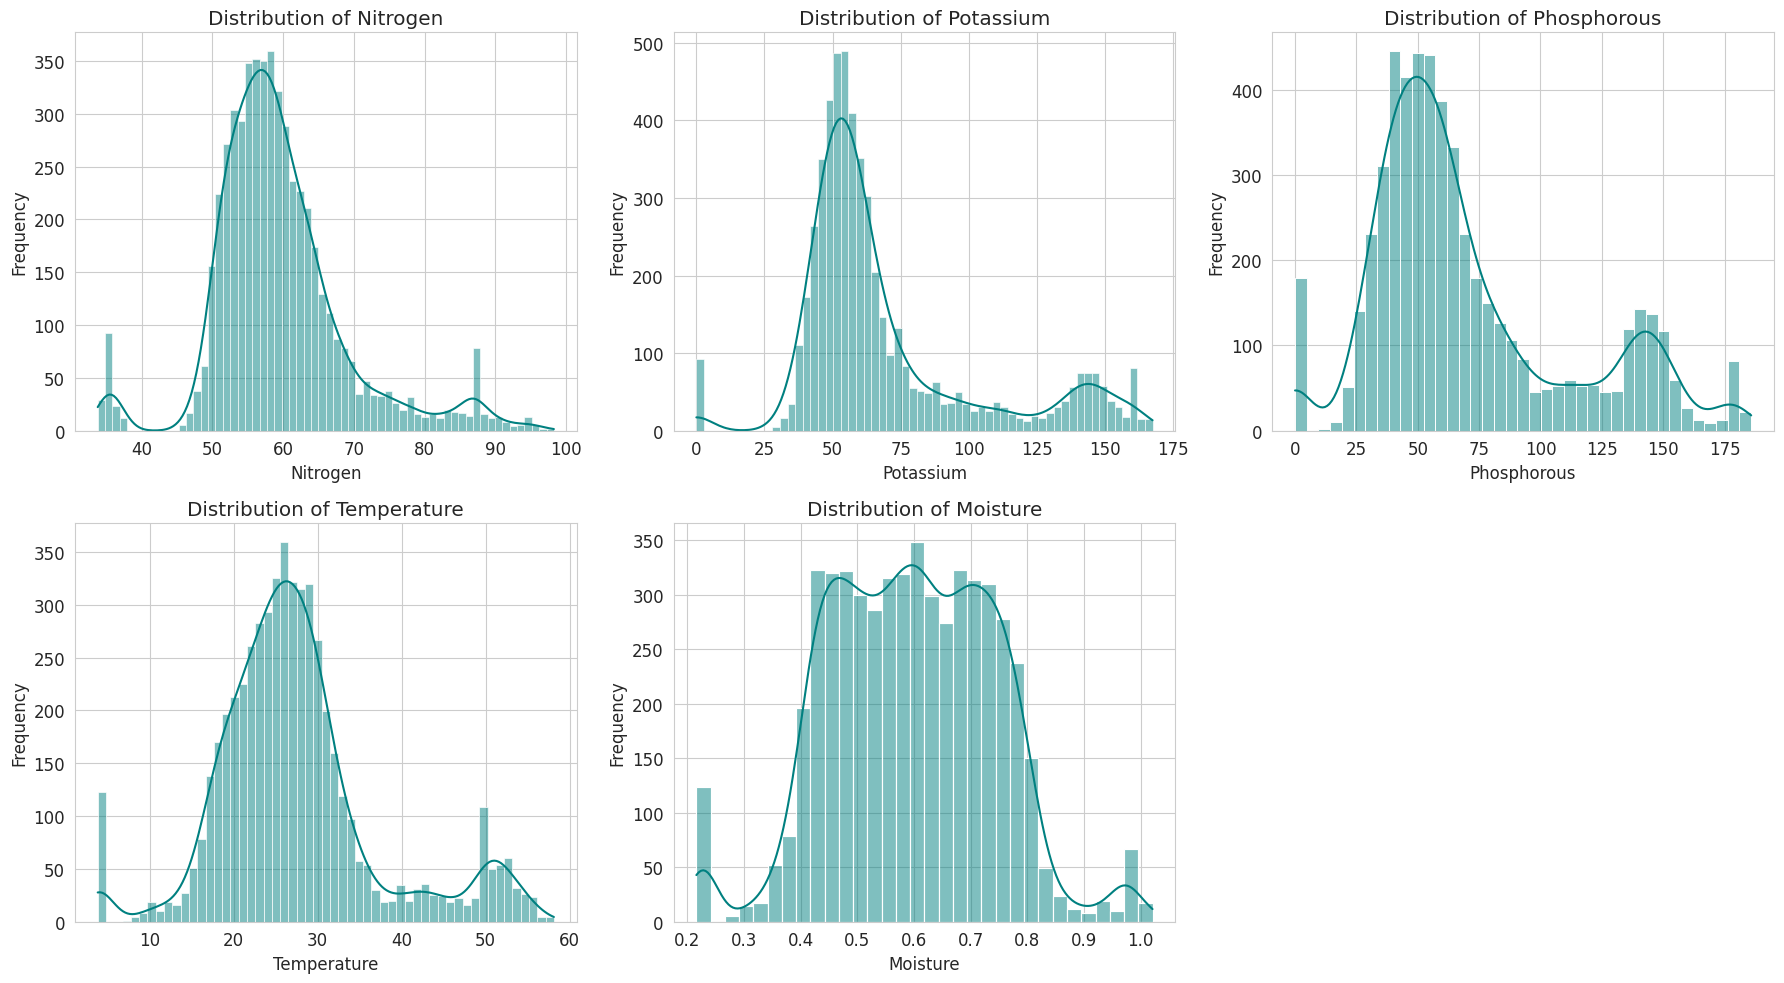

In [7]:
# Histograms for N, P, K, and Environmental factors
numeric_cols = ['nitrogen', 'potassium', 'phosphorous', 'temperature', 'humidity', 'moisture']

# Filter only columns that actually exist in your dataframe
existing_cols = [col for col in numeric_cols if col in df.columns]

plt.figure(figsize=(18, 10))
for i, col in enumerate(existing_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

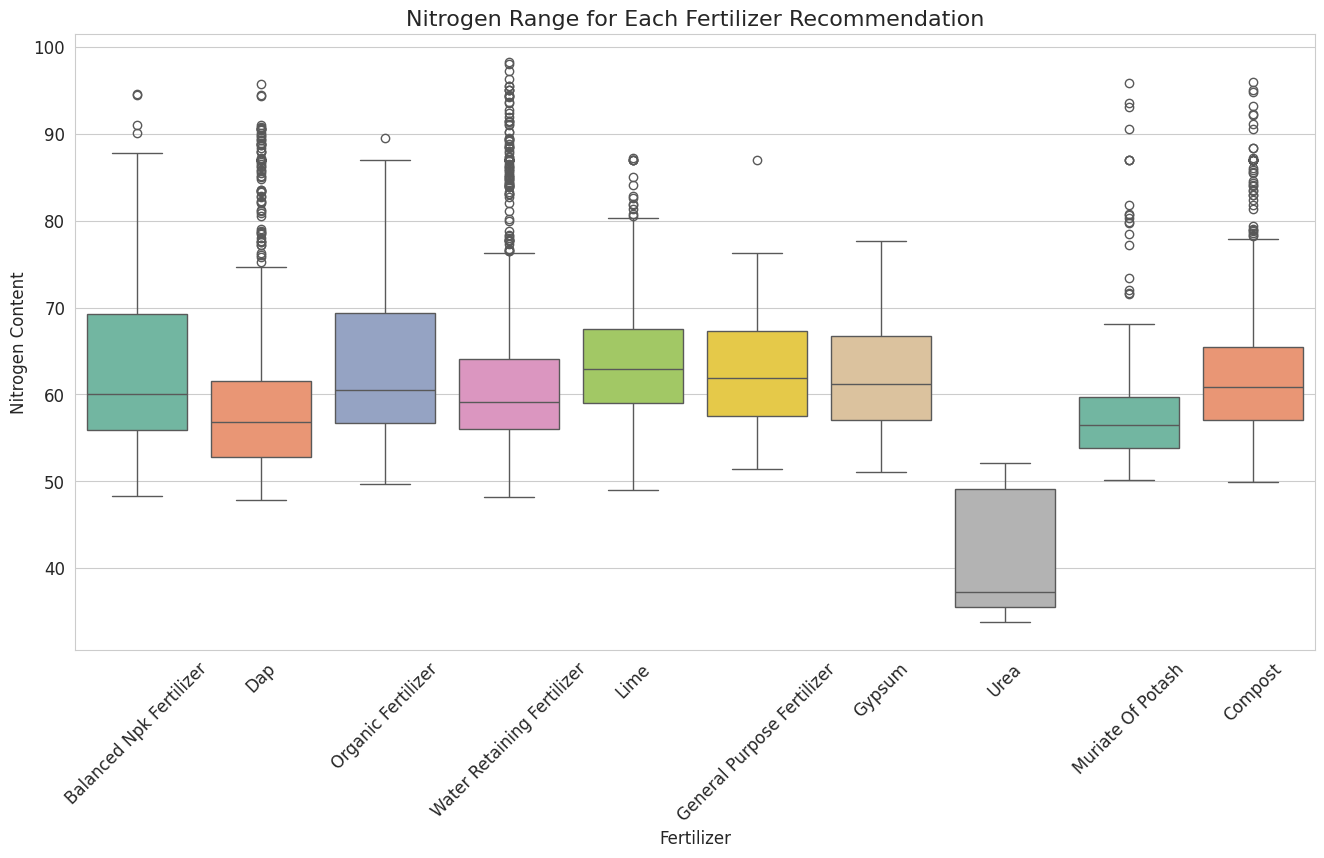

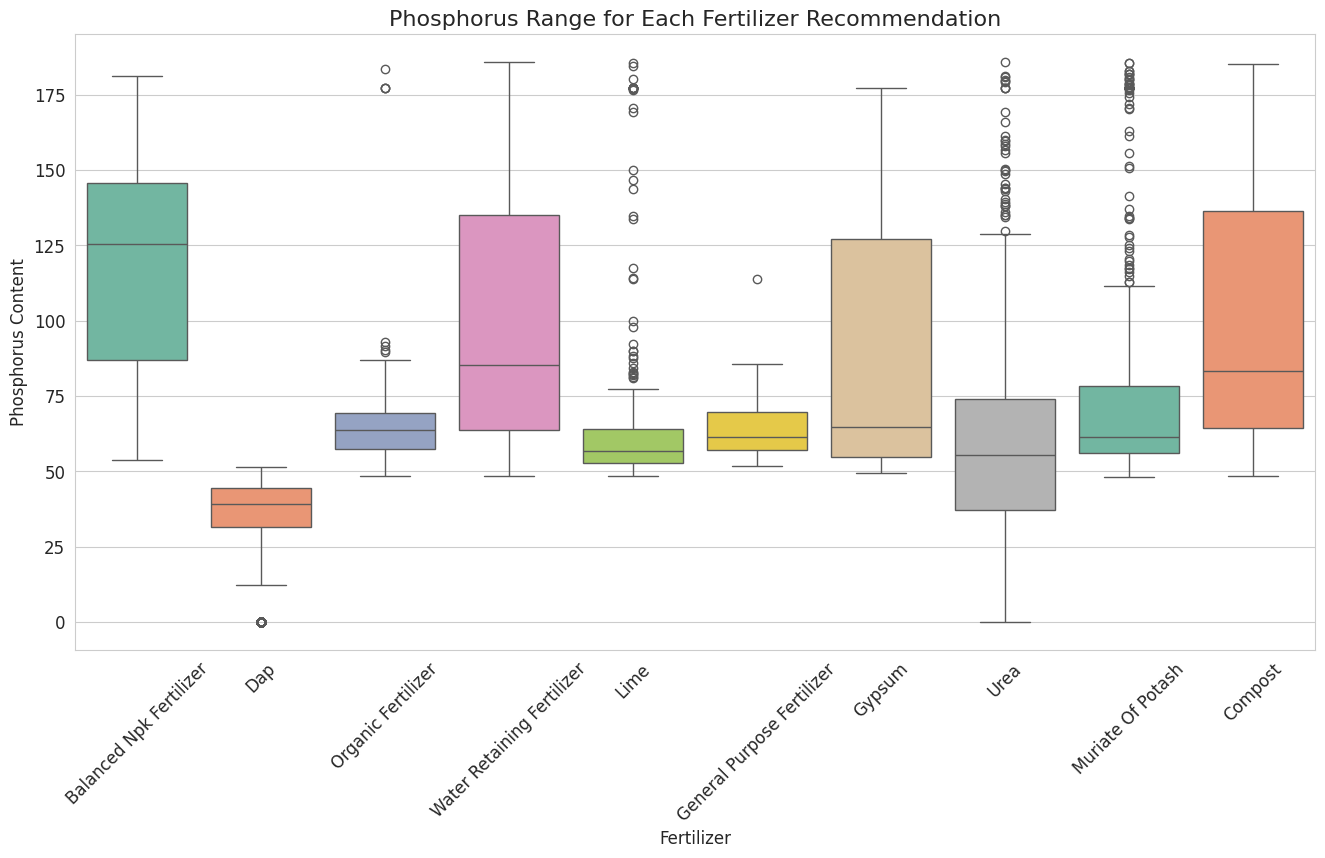

In [9]:
# Analyze how Nitrogen levels differ across Fertilizers
plt.figure(figsize=(16, 8))
sns.boxplot(x='fertilizer', y='nitrogen', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title('Nitrogen Range for Each Fertilizer Recommendation', fontsize=16)
plt.xlabel('Fertilizer')
plt.ylabel('Nitrogen Content')
plt.show()

# Analyze how Phosphorus levels differ across Fertilizers
plt.figure(figsize=(16, 8))
sns.boxplot(x='fertilizer', y='phosphorous', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title('Phosphorus Range for Each Fertilizer Recommendation', fontsize=16)
plt.xlabel('Fertilizer')
plt.ylabel('Phosphorus Content')
plt.show()

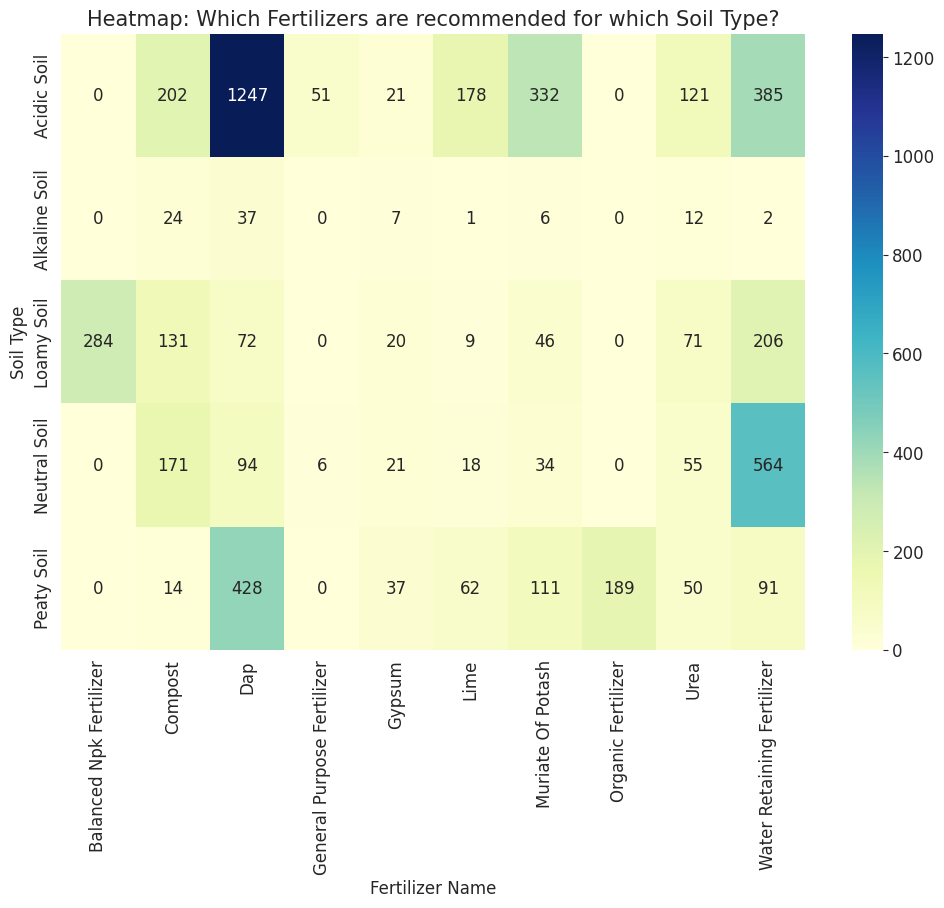

In [11]:
# Create a Crosstab to see relationship between Soil Type and Fertilizer
soil_fert_cross = pd.crosstab(df['soil'], df['fertilizer'])

plt.figure(figsize=(12, 8))
sns.heatmap(soil_fert_cross, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Which Fertilizers are recommended for which Soil Type?', fontsize=15)
plt.ylabel('Soil Type')
plt.xlabel('Fertilizer Name')
plt.show()

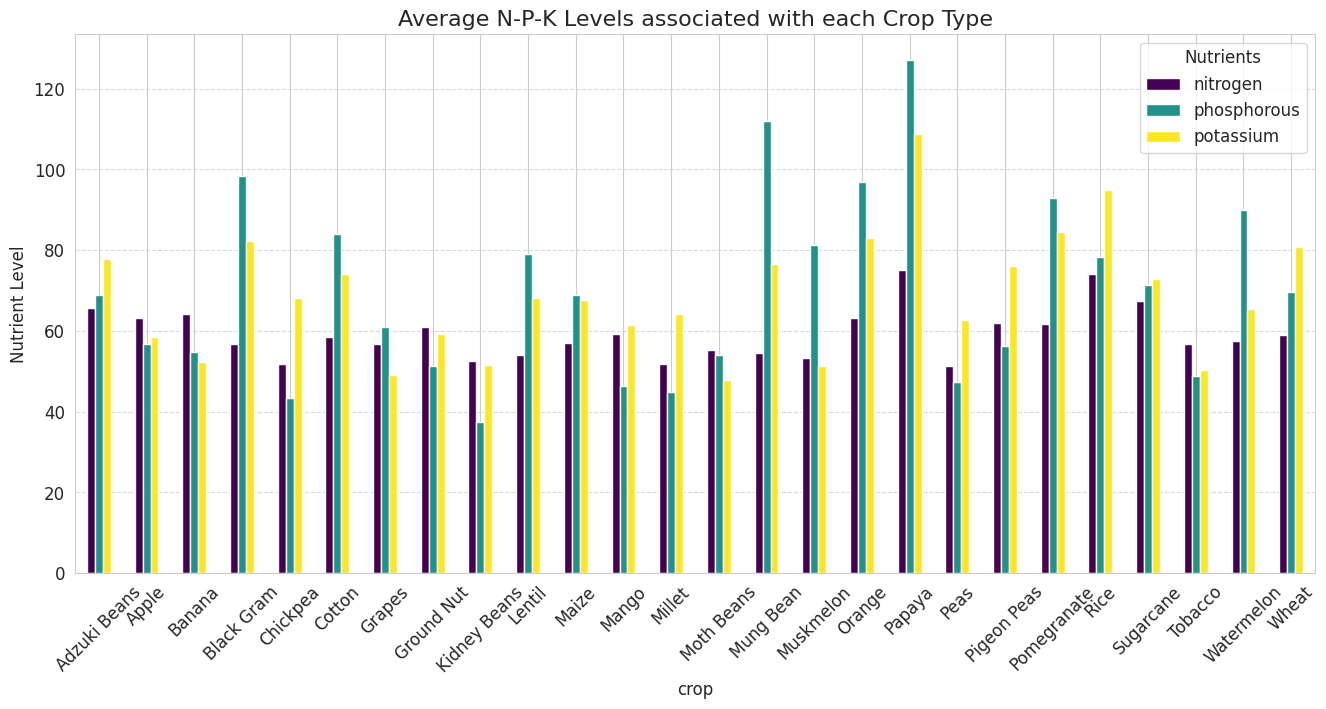

In [13]:
# Average Nutrient requirements per Crop Type
crop_pivot = df.pivot_table(index='crop', values=['nitrogen', 'phosphorous', 'potassium'], aggfunc='mean')

# Plotting
crop_pivot.plot(kind='bar', figsize=(16, 7), colormap='viridis')
plt.title('Average N-P-K Levels associated with each Crop Type', fontsize=16)
plt.ylabel('Nutrient Level')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Nutrients')
plt.show()

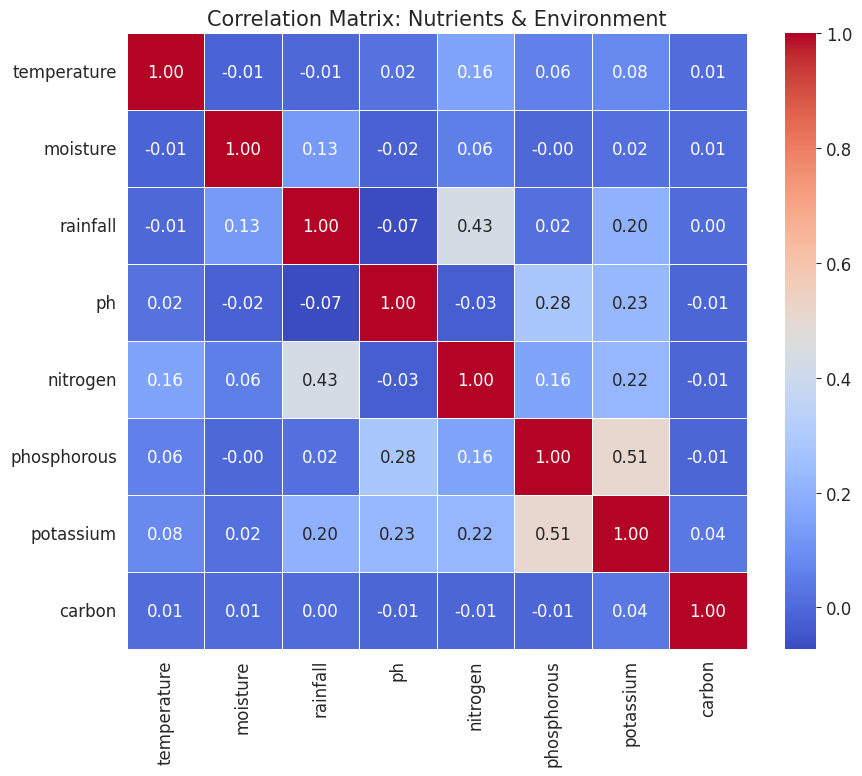

In [14]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Nutrients & Environment', fontsize=15)
plt.show()